# Multibody Dynamics

_intro_

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sympy.physics.mechanics import *
init_printing()

## Forward kinematics

The upcoming section is about the UR5 Robots forward kinematics.
The UR5 Robot has 6 Revolute Joints. Therefore the position of the end-effector can be described with 6 generalized coordinates. 
We calculate the forward kinematics with the Denavit Hartenberg convention.

In [3]:
# define generalized coordinates
q1, q2, q3, q4, q5, q6 = dynamicsymbols('q1, q2, q3, q4, q5, q6')

In [4]:
def dh_transformation_step(alpha, a, d, q):
    """
    returns a DH Transformation matrix.
    """
    transformation_matrix = Matrix([
        [cos(q), -sin(q), 0, a],
        [sin(q) * cos(alpha), cos(q) * cos(alpha), -sin(alpha), -sin(alpha) * d],
        [sin(q) * sin(alpha), cos(q) * sin(alpha), cos(alpha), cos(alpha) * d],
        [0, 0, 0, 1]
    ])
    return transformation_matrix

In [5]:
#initialize fixed parameters
a0, a1, a2, a3, a4, a5 = symbols('a0:6')
alpha0, alpha1, alpha2, alpha3, alpha4, alpha5 = symbols('alpha0:6')
d1, d2, d3, d4, d5, d6 = symbols('d1:7')

In [6]:
#define the denavit hartenberg parameters of the UR5
dh_params = {
    a0: 0, alpha0: 0,
    a1: 0, alpha1: pi/2, d1: 0.08916, q1: q1,
    a2: 0.425, alpha2: 0, d2: 0, q2: q2,
    a3: 0.39225, alpha3: 0, d3: 0, q3: q3,
    a4: 0, alpha4: pi/2, d4: 0.10915, q4: q4,
    a5: 0, alpha5: -pi/2, d5: 0.09456, q5: q5,
    d6: 0.0823, q6:q6
}

In [7]:
T01 = dh_transformation_step(alpha0, a0, d1, q1).subs(dh_params)
T12 = dh_transformation_step(alpha1, a1, d2, q2).subs(dh_params)
T23 = dh_transformation_step(alpha2, a2, d3, q3).subs(dh_params)
T34 = dh_transformation_step(alpha3, a3, d4, q4).subs(dh_params)
T45 = dh_transformation_step(alpha4, a4, d5, q5).subs(dh_params)
T56 = dh_transformation_step(alpha5, a5, d6, q6).subs(dh_params)

In [8]:
#Position of Point 6
T06 = simplify(T01 * T12 * T23 * T34 * T45 * T56).doit()

In [9]:
alles_null = {q1: 0, q2: 0, q3: 0, q4: 0, q5: 0, q6: 0}

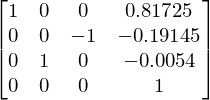

In [53]:
T06.subs(alles_null)

## Inverse Kinematics
We can derive the Inverse Kinematics symbollically, because the robot is designed with a wrist. 

To calculate the inverse Kinematics, we need to frist derive the position of the wrist (Joint5) with respect to the base-frame. In the forward kinematics, it would look like this:

In [11]:
T05 = simplify(T01 * T12 * T23 * T34 * T45)

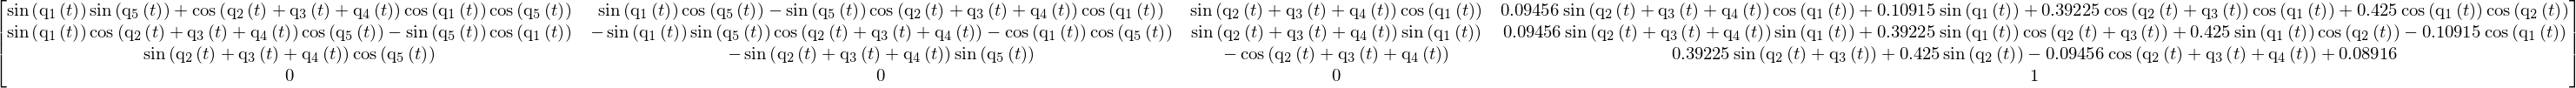

In [12]:
T05

The Translation T05 can also be written as: T06 - d6 * Z06 ->

In [13]:
T_05 = T06 * Matrix([0, 0, -d6, 1])

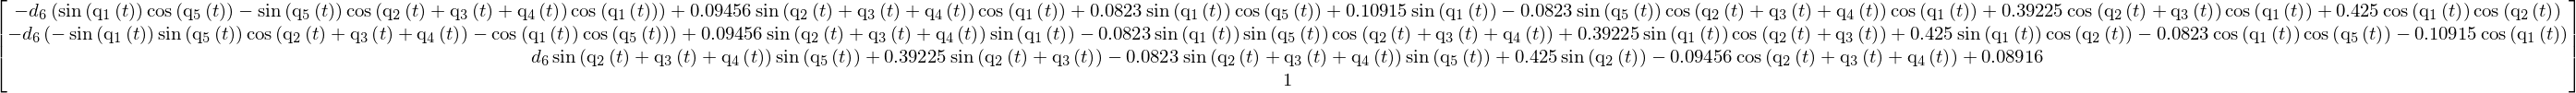

In [14]:
T_05

### Find q1

to find q1 we look at the robot from above.



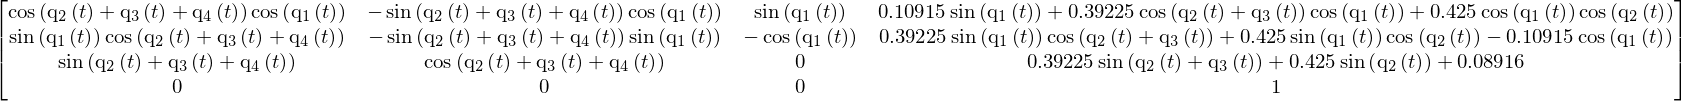

In [15]:
simplify(T01 * T12 * T23 * T34)

In [16]:
T01 = dh_transformation_step(alpha0, a0, d1, q1)
T12 = dh_transformation_step(alpha1, a1, d2, q2)
T23 = dh_transformation_step(alpha2, a2, d3, q3)
T34 = dh_transformation_step(alpha3, a3, d4, q4)
T45 = dh_transformation_step(alpha4, a4, d5, q5)
T56 = dh_transformation_step(alpha5, a5, d6, q6)

In [17]:
joint2 = simplify(T01 * T12)

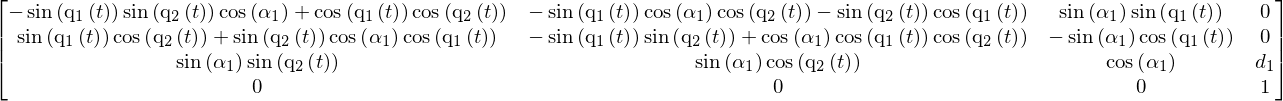

In [18]:
joint2.subs({a0: 0, a1:0, d2: 0, alpha0: 0})

In [19]:
joint3 = T01 * T12 * T23

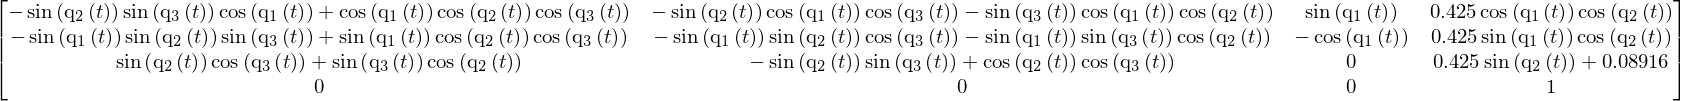

In [20]:
joint3.subs(dh_params)

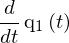

In [21]:
diff(q1)

In [22]:
x5, y5, z5, _ = (T01 * T12 * T23 * T34 * T45)[:, 3]

In [23]:
simplify(x5)

In [24]:
x1, y1, z1, _ = (T01)[:, 3]

In [25]:
x1.subs(dh_params)

In [26]:
y1.subs(dh_params)

In [27]:
z1.subs(dh_params)

In [28]:
x2, y2, z2, _ = (T01 * T12)[:, 3]

In [29]:
init_printing()

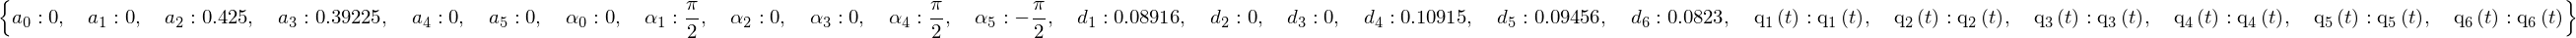

In [30]:
dh_params

In [31]:
x1.subs(dh_params)

In [32]:
y1.subs(dh_params)

In [33]:
z1.subs(dh_params)

In [34]:
x2.subs(dh_params)

In [35]:
y2.subs(dh_params)

In [36]:
z2.subs(dh_params)

In [37]:
x3, y3, z3, _ = (T01 * T12 * T23)[:,3]

In [38]:
x3.subs(dh_params)

In [39]:
y3.subs(dh_params)

In [40]:
z3.subs(dh_params)

In [41]:
z3.subs(dh_params).subs({q2: pi/2})

In [42]:
x3.subs(dh_params).subs({q1: 0, q2: 0})

In [43]:
temp1 = y3.subs(dh_params).subs({q1: pi/4, q2: pi/4})

In [44]:
temp1
N(temp1)

In [45]:
simplify(y3.subs(dh_params)).subs({q1: pi, q2: pi/2})

In [46]:
N(z3.subs(dh_params).subs({q2: pi/2}))

In [47]:
z3.subs(dh_params).subs({q2: pi/2})

In [48]:
x4, y4, z4, _ = (T01 * T12 * T23 * T34)[:, 3]

In [49]:
z4.subs(dh_params).subs({q2: pi/2})

In [50]:
z4.subs(dh_params)

In [51]:
z4.subs(dh_params).subs({q2: pi/2})

In [52]:
x4.subs(dh_params)

In [71]:
y4.subs(dh_params)

In [74]:
z4.subs(dh_params)

In [75]:
x5, y5, z5, _ = (T01 * T12 * T23 * T34 * T45)[:, 3]

In [80]:
x5.subs(dh_params)

In [77]:
y5.subs(dh_params)

In [79]:
z5.subs(dh_params)

## 

In [69]:
mechanics_printing()

In [66]:
q1d, q2d, q3d, q4d, q5d, q6d = dynamicsymbols('q1:7', 1)

In [70]:
q1d

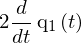

In [59]:
diff(2* q1, Symbol('t'))